In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning and EDA

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

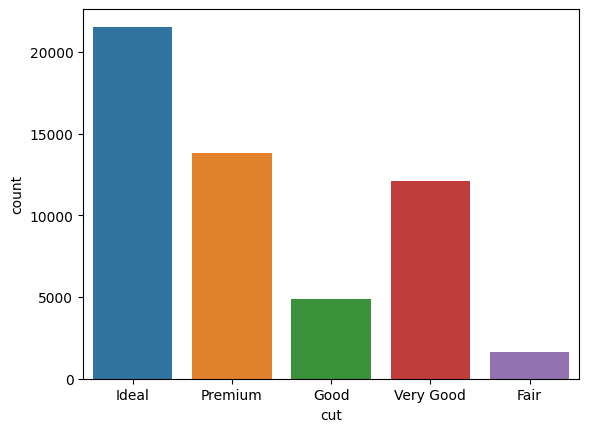

In [11]:
sns.countplot('cut',data=df)

In [12]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

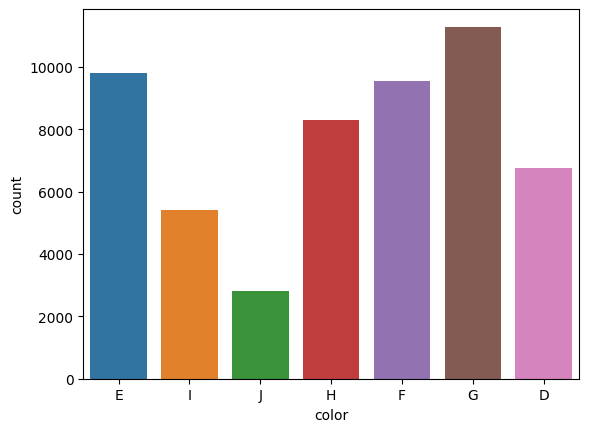

In [13]:
sns.countplot('color',data=df)

In [14]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

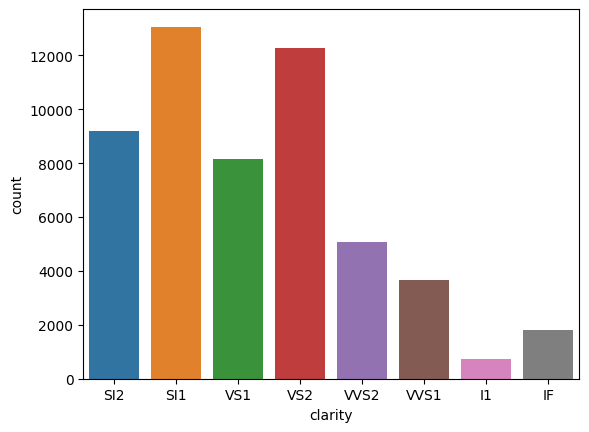

In [15]:
sns.countplot('clarity',data=df)

c:\Users\sivas\anaconda3\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price'>

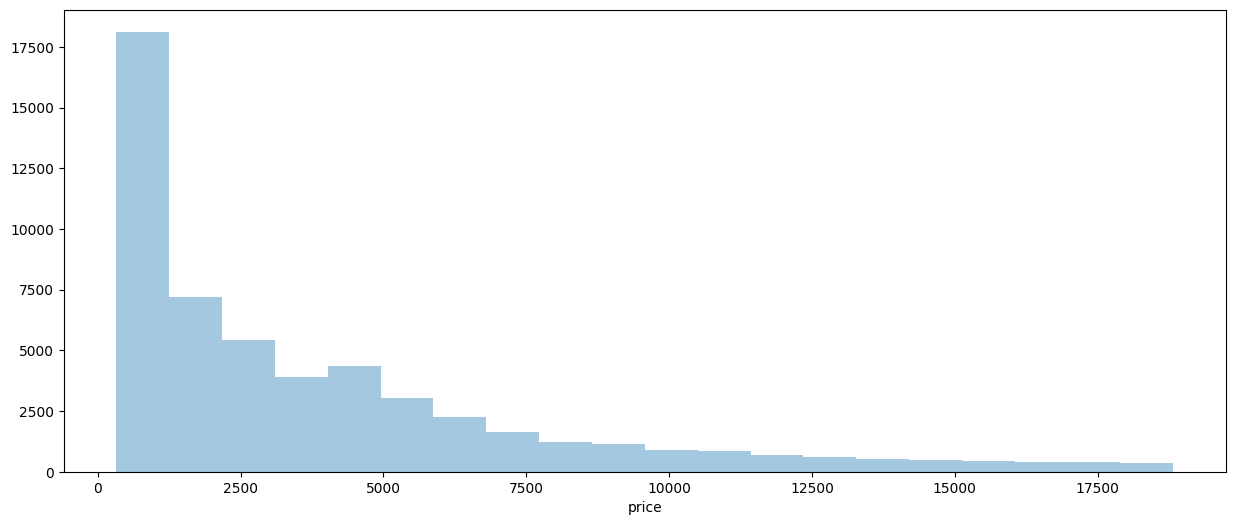

In [16]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'],kde=False,bins=20)

### Checking for correlation

In [17]:
correlation=df.corr()

In [18]:
print(correlation['price'].sort_values(ascending=False))

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


In [19]:
df.drop(['table','depth'],axis=1,inplace=True)

In [20]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


### Encoding the categorical variable and checking there correlation

In [21]:
def change_cut(a):
    if(a=='Fair'):
        return 0
    elif(a=='Good'):
        return 1
    elif(a=='Very Good'):
        return 2
    elif(a=='Premium'):
        return 3
    else:
        return 4

In [22]:
df['new_cut']=df['cut'].apply(change_cut)

In [23]:
def change_color(a):
    if(a=='J'):
        return 0
    elif(a=='I'):
        return 1
    elif(a=='H'):
        return 2
    elif(a=='G'):
        return 3
    elif(a=='F'):
        return 4
    elif(a=='E'):
        return 5
    else:
        return 6

In [24]:
df['new_color']=df['color'].apply(change_color)

In [25]:
df.head()

,carat,cut,color,clarity,price,x,y,z,new_cut,new_color
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,4,5
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,3,5
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,1,5
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,1,0


In [26]:
correlation=df.corr()

In [27]:
print(correlation['price'].sort_values(ascending=False))

price        1.000000
carat        0.921591
x            0.884435
y            0.865421
z            0.861249
new_cut     -0.053491
new_color   -0.172511
Name: price, dtype: float64


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df['new_clarity']=le.fit_transform(df['clarity'])

In [31]:
df.head()

,carat,cut,color,clarity,price,x,y,z,new_cut,new_color,new_clarity
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43,4,5,3
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31,3,5,2
2,0.23,Good,E,VS1,327,4.05,4.07,2.31,1,5,4
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63,3,1,5
4,0.31,Good,J,SI2,335,4.34,4.35,2.75,1,0,3


In [32]:
correlation=df.corr()

In [33]:
print(correlation['price'].sort_values(ascending=False))

price          1.000000
carat          0.921591
x              0.884435
y              0.865421
z              0.861249
new_cut       -0.053491
new_clarity   -0.071535
new_color     -0.172511
Name: price, dtype: float64


### There is no correlation between categorical variables

In [34]:
df1=df.drop(['color','cut','clarity'],axis=1)

In [35]:
df1.head()

,carat,price,x,y,z,new_cut,new_color,new_clarity
0,0.23,326,3.95,3.98,2.43,4,5,3
1,0.21,326,3.89,3.84,2.31,3,5,2
2,0.23,327,4.05,4.07,2.31,1,5,4
3,0.29,334,4.20,4.23,2.63,3,1,5
4,0.31,335,4.34,4.35,2.75,1,0,3


### Checking for outliers

<AxesSubplot:ylabel='z'>

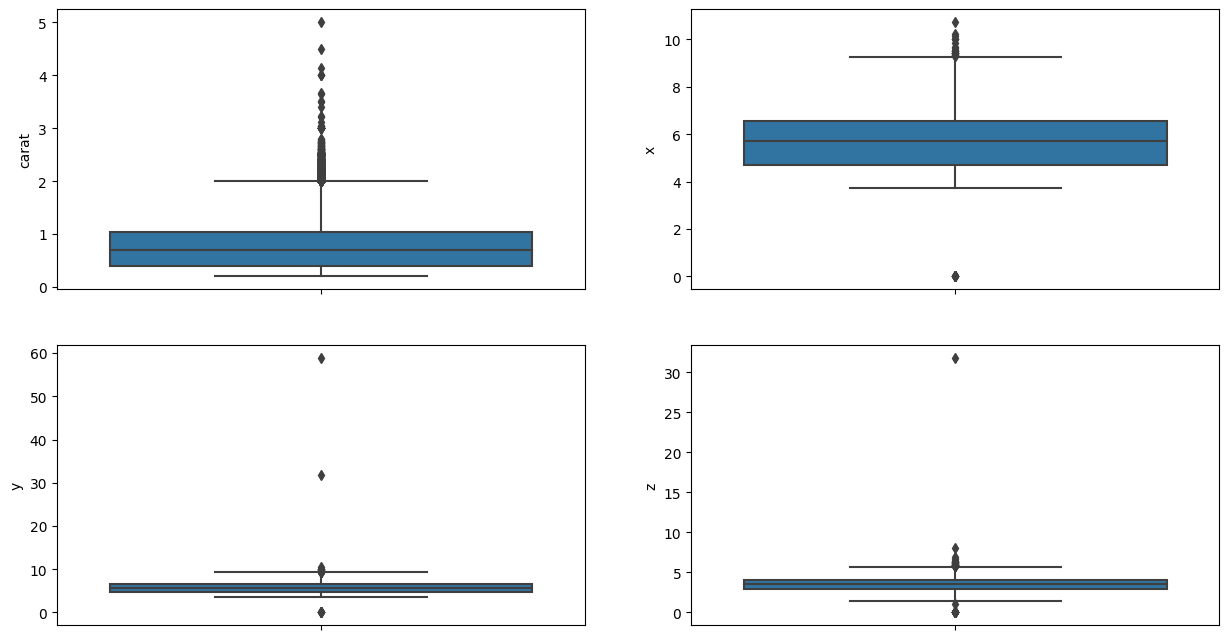

In [36]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
sns.boxplot(y='carat',data=df,ax=ax[0][0])
sns.boxplot(y='x',data=df1,ax=ax[0][1])
sns.boxplot(y='y',data=df1,ax=ax[1][0])
sns.boxplot(y='z',data=df1,ax=ax[1][1])

### Removing the outliers

In [37]:
fqt,tqt=np.percentile(df1['x'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(fqt,tqt)

4.71 6.54


In [38]:
df1.drop(df1[df1['x']<1].index,inplace=True)

In [39]:
fqt,tqt=np.percentile(df1['y'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(3*iqr)
print(fqt,tqt)

4.72 6.54


In [40]:
df1.drop(df1[df1['y']>ub].index,inplace=True)

In [41]:
fqt,tqt=np.percentile(df1['z'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(3*iqr)
print(lb,ub)

1.2150000000000003 7.43


In [42]:
df1.drop(df1[df1['z']>ub].index,inplace=True)

In [43]:
df1.drop(df1[df1['z']<lb].index,inplace=True)

<AxesSubplot:ylabel='z'>

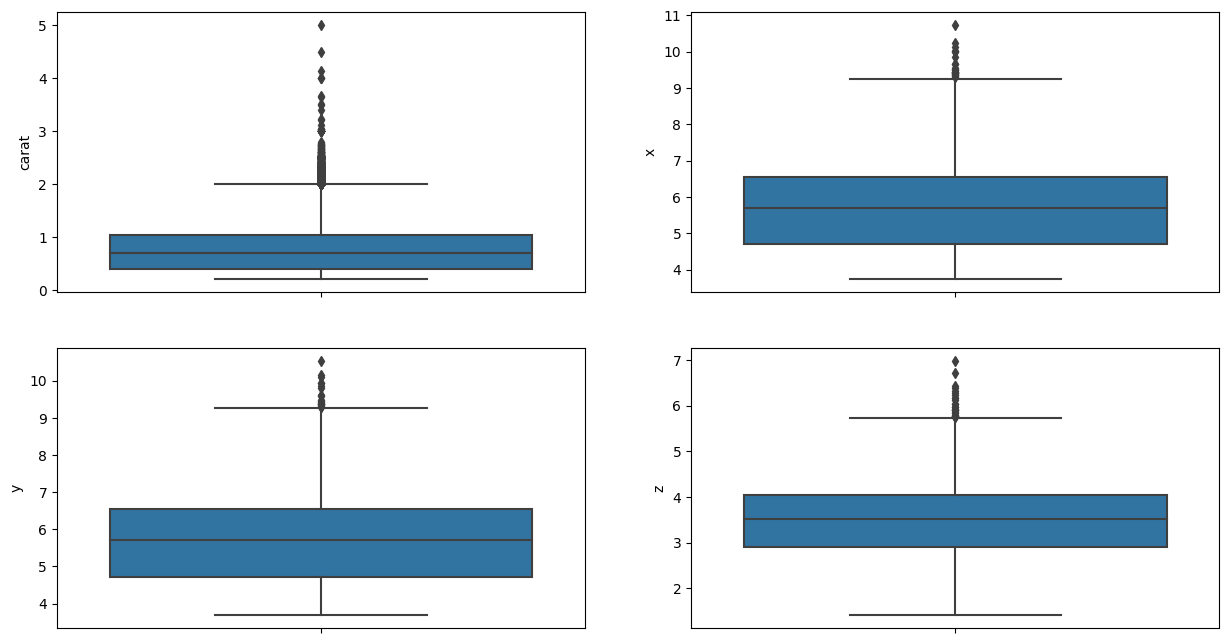

In [44]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
sns.boxplot(y='carat',data=df1,ax=ax[0][0])
sns.boxplot(y='x',data=df1,ax=ax[0][1])
sns.boxplot(y='y',data=df1,ax=ax[1][0])
sns.boxplot(y='z',data=df1,ax=ax[1][1])

In [45]:
df1.head(10)

,carat,price,x,y,z,new_cut,new_color,new_clarity
0,0.23,326,3.95,3.98,2.43,4,5,3
1,0.21,326,3.89,3.84,2.31,3,5,2
2,0.23,327,4.05,4.07,2.31,1,5,4
3,0.29,334,4.20,4.23,2.63,3,1,5
4,0.31,335,4.34,4.35,2.75,1,0,3
5,0.24,336,3.94,3.96,2.48,2,0,7
6,0.24,336,3.95,3.98,2.47,2,1,6
7,0.26,337,4.07,4.11,2.53,2,2,2
8,0.22,337,3.87,3.78,2.49,0,5,5
9,0.23,338,4.00,4.05,2.39,2,2,4


In [46]:
df1.shape

(53916, 8)

### Feature Scaling 

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
x=df1.drop('price',axis=1)
x

,carat,x,y,z,new_cut,new_color,new_clarity
0,0.23,3.95,3.98,2.43,4,5,3
1,0.21,3.89,3.84,2.31,3,5,2
2,0.23,4.05,4.07,2.31,1,5,4
3,0.29,4.20,4.23,2.63,3,1,5
4,0.31,4.34,4.35,2.75,1,0,3
...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,4,6,2
53936,0.72,5.69,5.75,3.61,1,6,2
53937,0.70,5.66,5.68,3.56,2,6,2
53938,0.86,6.15,6.12,3.74,3,2,3


In [49]:
scaler=StandardScaler()

In [50]:
X=scaler.fit_transform(x)
X

array([[-1.198208  , -1.59156334, -1.57785209, ...,  0.98138424,
         0.93698439, -0.48445839],
       [-1.24042209, -1.6451637 , -1.7038347 , ...,  0.08579492,
         0.93698439, -1.06431141],
       [-1.198208  , -1.50222941, -1.49686327, ..., -1.70538373,
         0.93698439,  0.09539462],
       ...,
       [-0.20617694, -0.06395306, -0.04806331, ..., -0.8097944 ,
         1.52477731, -1.06431141],
       [ 0.13153576,  0.37378322,  0.34788203, ...,  0.08579492,
        -0.82639437, -0.48445839],
       [-0.10064172,  0.08791463,  0.12291309, ...,  0.98138424,
         1.52477731, -0.48445839]])

In [51]:
y=df1['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53916, dtype: int64

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
from xgboost import XGBRegressor

In [55]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [56]:
print(cross_val_score(LinearRegression(),X,y,scoring='r2',cv=cv))

[0.88623368 0.88665627 0.88421499 0.88844576 0.88465523 0.8803662
 0.89041373 0.88833707 0.88619736 0.88725662]


In [57]:
print(cross_val_score(LinearRegression(),X,y,scoring='r2',cv=cv).mean())

0.886277689413778


In [58]:
print(cross_val_score(RandomForestRegressor(),X,y,scoring='r2',cv=cv))

[0.98088964 0.98124656 0.98123216 0.98058458 0.98120143 0.97982053
 0.97933092 0.98040069 0.97935841 0.98126501]


In [59]:
print(cross_val_score(RandomForestRegressor(),X,y,scoring='r2',cv=cv).mean())

0.9805171315087403


In [60]:
print(cross_val_score(AdaBoostRegressor(),X,y,scoring='r2',cv=cv))

[0.89228566 0.90410889 0.89414666 0.9009667  0.88992708 0.88623535
 0.90342804 0.87631183 0.88475732 0.89786062]


In [61]:
print(cross_val_score(AdaBoostRegressor(),X,y,scoring='r2',cv=cv).mean())

0.8933044838123744


In [62]:
print(cross_val_score(GradientBoostingRegressor(),X,y,scoring='r2',cv=cv))

[0.97191763 0.97280336 0.97105841 0.97204996 0.97291401 0.97112849
 0.97162374 0.97184174 0.97047919 0.97205344]


In [63]:
print(cross_val_score(GradientBoostingRegressor(),X,y,scoring='r2',cv=cv).mean())

0.9717966784164422


In [64]:
print(cross_val_score(XGBRegressor(),X,y,scoring='r2',cv=cv))

[0.98067976 0.98209107 0.98156726 0.98077316 0.98207931 0.98040962
 0.98040564 0.98107566 0.98048934 0.98106051]


In [65]:
print(cross_val_score(XGBRegressor(),X,y,scoring='r2',cv=cv).mean())

0.981063133962269


### Saving the best model and predicting

In [66]:
xgb=XGBRegressor()

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
prediction=xgb.predict(x_test)

In [70]:
xgb.score(x_train,y_train)

0.9911762389698449

In [71]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [72]:
print(r2_score(y_test,prediction))

0.9806797586060467


In [73]:
print(np.sqrt(mean_squared_error(y_test,prediction)))

546.7002159702738


### Model is 98% accurate

#### Predicting a new price

In [74]:
def predict(a):
    a=scaler.transform(a)
    price=xgb.predict(a)
    return price
    

In [75]:
a=[[0.23,3.95,3.98,2.43,4,5,3]]
price=predict(a)
print(price)

[340.58392]


C:\Users\sivas\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
